In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
data = np.loadtxt('PEMA.csv', delimiter=',')

In [92]:
energy = data[50:,0]
intensity = data[50:,1]
# intensity = intensity/np.max(intensity)
intensity.shape

(189,)

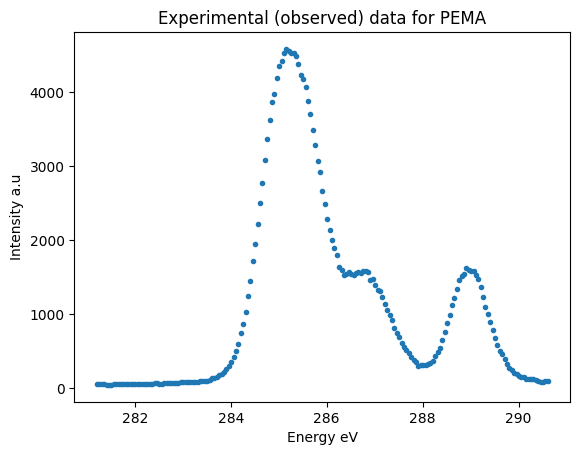

In [93]:
fig = plt.figure()
plt.plot(energy,intensity,'.')
plt.xlabel('Energy eV')
plt.ylabel('Intensity a.u')
plt.title('Experimental (observed) data for PEMA')
plt.show()


### 2.1. RMS error between two datasets

Given two arrays of equal length, the **root-mean-square (RMS) error** is:

$\mathrm{RMS}(y, \hat{y}) = \sqrt{\frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 }$

The code below defines a function for calculating the RMS between two datasets (y and yhat).


In [18]:
def rms_error(y, yhat):
    """Compute the root-mean-square error between y and yhat.

    Parameters
    ----------
    y : array_like
        Ground-truth or observed data.
    yhat : array_like
        Model predictions at the same x-values.

    Returns
    -------
    float
        RMS error.
    """
    y = np.asarray(y)
    yhat = np.asarray(yhat)
    if y.shape != yhat.shape:
        raise ValueError("y and yhat must have the same shape")
    rmse_value = float(np.sqrt(np.mean((y - yhat) ** 2)))
    return(rmse_value)


### Residuals

One other method for assessing goodness of fit is to visually inspect the residuals of the fit. The residuals are the difference between the observed and fitted data, and you can obtain them by simply subtracting the fitted data from the original data. The code below calculates the residuals for each of the two fits, and then plots the residuals below each fit.

In [19]:
# #Calculating the residuals for each fit
# residuals_gaussian = y_obs - gaussian(x, best_gaussian[0],best_gaussian[1],best_gaussian[2])
# residuals_lorentzian = y_obs - lorentzian(x, best_lorentzian[0],best_lorentzian[1],best_lorentzian[2])

# fig, axs = plt.subplots(2, 2)

# # Top plot: data and fit
# axs[0,0].plot(x, y_obs, '.', ms=3, label='Observed')
# axs[0,0].plot(x, gaussian(x, best_gaussian[0],best_gaussian[1],best_gaussian[2]), label=f'Gaussian fit (RMS={best_rms_gaussian:.4f})')
# axs[0,0].set_ylabel("Intensity")
# axs[0,0].set_title("Gaussian fit (minimize RMS)")

# # Bottom plot: residuals
# axs[1,0].axhline(0, color='k', lw=1)
# axs[1,0].plot(x, residuals_gaussian, '.', ms=3, color="red")
# axs[1,0].set_xlabel("x")
# axs[1,0].set_ylabel("Residuals")

# # Top plot: data and fit
# axs[0,1].plot(x, y_obs, '.', ms=3, label='Observed')
# axs[0,1].plot(x, lorentzian(x, best_lorentzian[0],best_lorentzian[1],best_lorentzian[2]), label=f'Gaussian fit (RMS={best_rms_gaussian:.4f})')
# axs[0,1].set_ylabel("Intensity")
# axs[0,1].set_title("Lorentzian fit (minimize RMS)")

# # Bottom plot: residuals
# axs[1,1].axhline(0, color='k', lw=1)
# axs[1,1].plot(x, residuals_lorentzian, '.', ms=3, color="red")
# axs[1,1].set_xlabel("x")
# axs[1,1].set_ylabel("Residuals")

# plt.tight_layout()
# plt.show()

## 3. Voigt profiles
The Gaussian and Lorentzian lineshapes used so far fit to many different types of data. However, there are many types of spectroscopy in which lineshapes become a little more complicated.


In X-ray photoelectron spectroscopy (XPS), and many other types of spectroscopy, peaks take a shape known as a Voigt profile, which is a convolution of a Gaussian and Lorentzian function. This shape often arises due to combinations of Gaussian and Lorentzian peak broadening processes.

Thankfully, rather than having to code a convolution of two functions, scipy provides us with a function to generate a Voigt profile. The `voigt_profile()` function takes 3 arguments: the array of x values, the sigma of the Gaussian distribution and the gamma of the Lorentzian distribution.

In [20]:
from scipy.special import voigt_profile

In [22]:
#Input your answer to 3.1 here.
def shifted_voigt(x, area, centre, sigma, gamma):
    y_voigt_shifted = area*voigt_profile(x-centre, sigma, gamma)
    return y_voigt_shifted

In [23]:
#Input your answer to 4.1 here.
def multi_voigt(x,*par):
    n_peaks = len(par)/4
    y_multi_voigt = np.zeros_like(x)

    for i in range(int(n_peaks)):
        #In the line below, the index of params is 4*i as there are 4 parameters per peak.
        y_multi_voigt += shifted_voigt(x, par[4*i],par[4*i+1], par[4*i+2], par[4*i+3])
        print(par[4*i])
    return y_multi_voigt

In [24]:
from scipy.optimize import curve_fit

4000.0
4000.0
2000.0
2000.0
4000.000059604645
4000.0
2000.0
2000.0
4000.0
4000.0
2000.0
2000.0
4000.0
4000.0
2000.0
2000.0
4000.0
4000.0
2000.0
2000.0
4000.0
4000.000059604645
2000.0
2000.0
4000.0
4000.0
2000.0
2000.0
4000.0
4000.0
2000.0
2000.0
4000.0
4000.0
2000.0
2000.0
4000.0
4000.0
2000.0000298023224
2000.0
4000.0
4000.0
2000.0
2000.0
4000.0
4000.0
2000.0
2000.0
4000.0
4000.0
2000.0
2000.0
4000.0
4000.0
2000.0
2000.0000298023224
4000.0
4000.0
2000.0
2000.0
4000.0
4000.0
2000.0
2000.0
4000.0
4000.0
2000.0
2000.0
24978574.324533526
-24973464.0710346
3801.2564763118144
3124.145829290876
2515972.1836114633
-2477723.917554513
-29013.84152790954
2660.5674061925874
269742.2264999279
-228195.37664317485
-32281.32430696091
2615.01426018858
8614.467852735557
8777.03523543012
-10096.90945702263
3973.644622248934
3737.0976294728366
3877.9961072936107
1260.2698506318168
2460.757317035013
4009.8989815192067
4037.4031478137344
2004.1132100466039
2014.8013132615315
4009.899041271358
4037.40314781

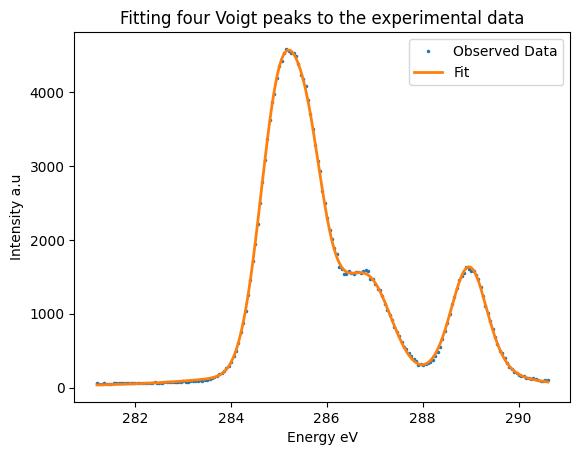

In [94]:
# Initial guess for [A1, x01, sigma1, gamma1, A2, x02, sigma2, gamma2]
p0 = [4000, 285, 0.5, 0.5, 4000, 285.3, 0.5, 0.5, 2000, 286.5, 0.5, 0.5, 2000, 289, 0.5, 0.5]

#Calculate the optimal parameters and the covariance of parameters.
popt, pcov = curve_fit(multi_voigt, energy, intensity, p0=p0)

print("Best-fit parameters:", popt)

#Generate a profile based on the optimal parameters in popt
intensity_fit = multi_voigt(energy, *popt)

plt.plot(energy, intensity, '.', ms=3, label="Observed Data") #Plot the original data
plt.plot(energy, intensity_fit, '-', lw=2, label="Fit") #Plot the fitted function
plt.xlabel('Energy eV')
plt.ylabel('Intensity a.u')
plt.legend(); plt.title("Fitting four Voigt peaks to the experimental data")
plt.show()

In [95]:
perr = np.sqrt(np.diag(pcov))
print(perr)

[1.40864983e+02 1.38437923e-02 1.28155135e-02 2.29516591e-02
 1.80815446e+02 1.70162066e-02 3.97033956e-02 3.77612824e-02
 6.53013130e+01 6.85854425e-03 2.22285133e-02 5.52170912e-02
 3.14358453e+01 2.77866232e-03 8.78835352e-03 1.36697085e-02]


In [96]:
rms = rms_error(intensity, intensity_fit)
rms

19.223451322984065

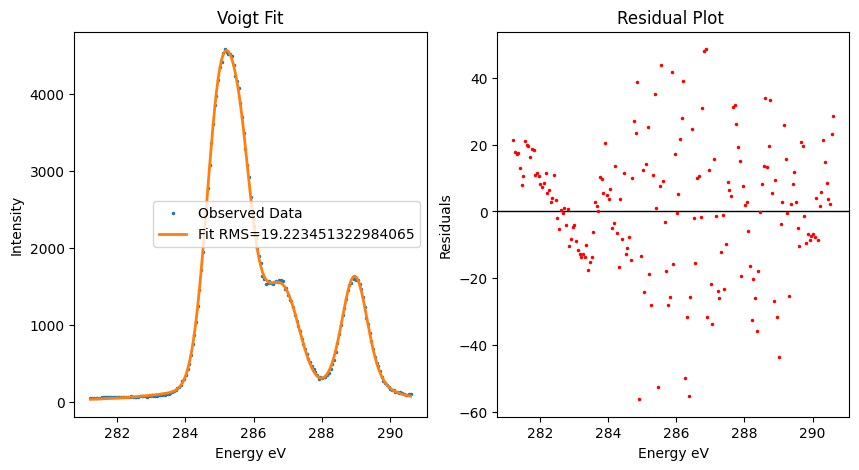

In [97]:
residuals = intensity - intensity_fit
fig, axs = plt.subplots(1, 2)

axs[0].plot(energy, intensity, '.', ms=3, label='Observed Data')
axs[0].plot(energy, intensity_fit, '-', lw=2, label=f"Fit RMS={rms}")
axs[0].set_ylabel("Intensity")
axs[0].set_xlabel("Energy eV")
axs[0].set_title("Voigt Fit")

axs[1].axhline(0, color='k', lw=1)
axs[1].plot(energy, residuals, '.', ms=3, color="red")
axs[1].set_xlabel("Energy eV")
axs[1].set_ylabel("Residuals")
axs[1].set_title("Residual Plot ")
axs[0].legend()
fig.set_size_inches(10,5)
plt.show()